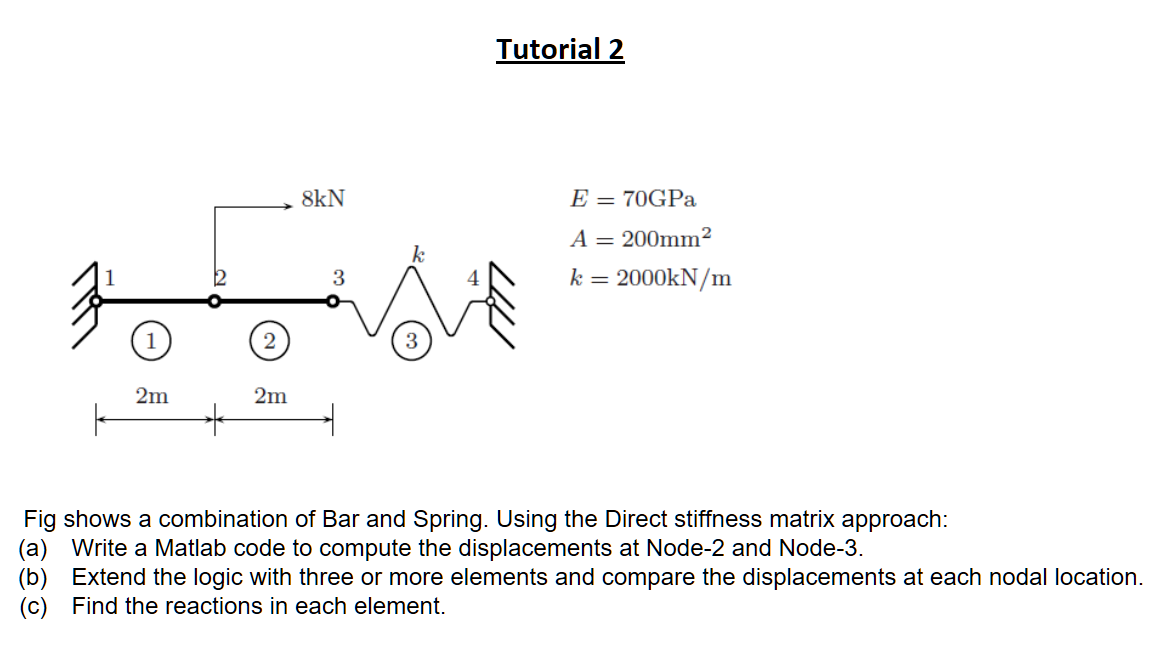

Input number of elements for beam:2


'Global stiffness Matrix'

⎡ 2⋅A⋅E   -2⋅A⋅E                ⎤
⎢ ─────   ───────      0      0 ⎥
⎢   L        L                  ⎥
⎢                               ⎥
⎢-2⋅A⋅E    4⋅A⋅E    -2⋅A⋅E      ⎥
⎢───────   ─────    ───────   0 ⎥
⎢   L        L         L        ⎥
⎢                               ⎥
⎢         -2⋅A⋅E   2⋅A⋅E        ⎥
⎢   0     ───────  ───── + k  -k⎥
⎢            L       L          ⎥
⎢                               ⎥
⎣   0        0        -k      k ⎦

'Displacement at nodes:'

⎡         0          ⎤
⎢                    ⎥
⎢0.000935064935064935⎥
⎢                    ⎥
⎢0.000727272727272727⎥
⎢                    ⎥
⎣         0          ⎦

'Reactions at each node:'

⎡-6.54545454545454⎤
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎣-1.45454545454545⎦

In [3]:
import sympy as sp
import numpy as np
from sympy import Matrix, symbols, init_printing, N
from IPython.display import Image
display(Image("q2.png"))
init_printing(pretty_print = True)

#This function converts very small values to 0. This is the best piece of code here.
def reduce(mat): return Matrix(mat.shape[0], mat.shape[1], lambda i,j: 0 if abs(mat[i]) < 0.000001 else mat[i])

P, E, A, L, k = symbols('P E A L k')
belem = int(input('Input number of elements for beam:'))
bnode = belem + 1   #Nodes = Elements + 1
elen = L / belem
Kb = Matrix(bnode, bnode, lambda i,j: 0)
for pos in range(bnode-1):              #This loop builds the beam stiffness matrix for any number of nodes in the beam.
        Kb[pos:pos+2, pos:pos+2] += Matrix(2, 2, lambda i,j: A * E / elen if i==j else -A * E / elen)
Ks = Matrix(2, 2, lambda i,j: k if i==j else -k)
#display(Kb, Ks)
glo = bnode + 1                             #Global node count.
Kg = Matrix(glo, glo, lambda i,j: 0)        #This code bit creates a global stiffness matrix. This bit isn't scalable yet. 
Kg[0:bnode, 0:bnode] += Matrix(bnode, bnode, Kb)
Kg[glo-2:glo, glo-2:glo] += Matrix(2, 2, Ks)
display('Global stiffness Matrix',Kg)

K = Matrix(Kg)                             #Applying boundary conditions here.
X = 1.E+30
K[0,0] = X
K[glo-1,glo-1] = X
#display(K)

F = Matrix(glo, 1, lambda i,j: P if i==1 else 0)          #This scales for any number of nodes. 

u = K.LUsolve(F)                          # Solve for displacements.
#display(u)

#subs = {k: 2000*10**3, A: 200*10*-6, E:70*10**9, P: 8*10**3, L: 4}
subs = {k: 2000, A: 200, E:70, P: 8, L: 4}
usol = N(u.subs(subs))
#display(usol)
display('Displacement at nodes:',reduce(usol))

#Solve for reactions by back substituting u in to the global equations
react = Kg * u - F
rsol = react.subs(subs)
display('Reactions at each node:', reduce(rsol))